## Homework 3 Yuqi(Peggy) Cao
This jupyter notebook is presented for MUSI 6001 homework 3. 
I use python and write it in jupyter notebook  

1) I use the pandas library to parse the csv file and import as a dataframe called "df".

In [1]:
%matplotlib inline

In [38]:
import pandas


from IPython.display import HTML, display

df = pandas.read_csv('airquality.csv', 
                     names=['No.','Ozone',  'Solar.R',  'Wind',  'Temp',  'Month',  'Day'],header=0)
# df.columns = ['No.','Ozone',  'Solar.R',  'Wind',  'Temp',  'Month',  'Day']
print(df)


     No.  Ozone  Solar.R  Wind  Temp  Month  Day
0      1   41.0    190.0   7.4    67      5    1
1      2   36.0    118.0   8.0    72      5    2
2      3   12.0    149.0  12.6    74      5    3
3      4   18.0    313.0  11.5    62      5    4
4      5    NaN      NaN  14.3    56      5    5
5      6   28.0      NaN  14.9    66      5    6
6      7   23.0    299.0   8.6    65      5    7
7      8   19.0     99.0  13.8    59      5    8
8      9    8.0     19.0  20.1    61      5    9
9     10    NaN    194.0   8.6    69      5   10
10    11    7.0      NaN   6.9    74      5   11
11    12   16.0    256.0   9.7    69      5   12
12    13   11.0    290.0   9.2    66      5   13
13    14   14.0    274.0  10.9    68      5   14
14    15   18.0     65.0  13.2    58      5   15
15    16   14.0    334.0  11.5    64      5   16
16    17   34.0    307.0  12.0    66      5   17
17    18    6.0     78.0  18.4    57      5   18
18    19   30.0    322.0  11.5    68      5   19
19    20   11.0     

2) Then I used pandas library's functions to calcuate the mean, median, and mode for the wind speed and temperature variables.

In [20]:
mean_windspeed = df['Wind'].mean() # calculates the average of all values under the "Wind"
mean_temp = df['Temp'].mean() # calculates the average of all values under the "Temp"
median_windspeed = df['Wind'].median()
median_temp = df['Temp'].median()
mode_windspeed = df['Wind'].mode()
mode_temp = df['Temp'].mode()
# print(mode_windspeed[0])
# print(mode_temp[0])

Then I wrote those data as a table and print those out in pandas 's dataframe format

In [21]:
table = [
[mean_windspeed, mean_temp],    
[median_windspeed, median_temp],
[str.format('{0:.2f}', mode_windspeed[0]), str.format('{0:.2f}', mode_temp[0])]    
]

pandas.DataFrame(table, columns=["Wind speed", "Temperature"], index=["Mean", "Median", "Mode"])


,Wind speed,Temperature
Mean,9.95752,77.8824
Median,9.7,79
Mode,11.50,81.00


3) I use the matplotlib to plot those two plots

Text(0.5,0,u'Date in order')

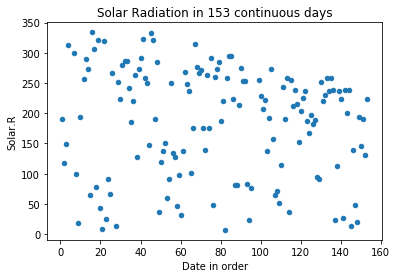

In [45]:
import matplotlib.pyplot as plt
import numpy as np
# xxx = np.arange(1, 154, 1)
# print xxx

plot1 = df.plot(kind='scatter',x='No.',y='Solar.R', title='Solar Radiation in 153 continuous days')
plot1.set_xlabel("Date in order")

Text(0.5,0,u'Date in order')

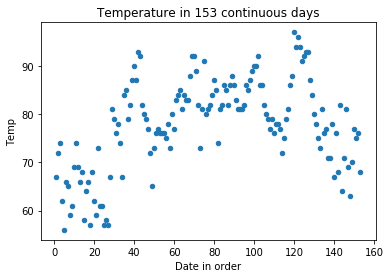

In [46]:
plot2 = df.plot(kind='scatter',x='No.',y='Temp', title='Temperature in 153 continuous days')
plot2.set_xlabel("Date in order")

It seems that the temperature is closer to resembling a normal distribution

4) I used pandas 's functions to calculate the mean, the range (i.e., maximum and minimum values), and the standard deviation of the ozone values. Then simply print them out

In [47]:
mean1 = df['Ozone'].mean()
max1 = df['Ozone'].max() # calculates the max of all values under the Salary column
min1 = df['Ozone'].min()
std1 = df['Ozone'].std ()
print("mean: " + str.format('{0:.4f}', mean1))
range = (min1, max1)
print("range: " + str(range))
print("standard deviation: " + str.format('{0:.4f}', std1))

mean: 42.1293
range: (1.0, 168.0)
standard deviation: 32.9879


5) 